In [1]:
import altair as alt
from altair import datum
import pandas as pd

In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
who_df = pd.read_csv('../data/WHO_life_expectancy_data_clean.csv')

In [4]:
who_df = who_df.iloc[:, [1, 2, 3, 4, 8, 14, 17]]

In [ ]:
who_df.columns

In [ ]:
who_df.head()

In [ ]:
who_df.country.unique()

In [ ]:
who_df['life_pct_change']=who_df.groupby('country').agg({'life_expectancy':'pct_change'})
who_df['gdp_pct_change']=who_df.groupby('country').agg({'gdp':'pct_change'})

In [5]:
def make_life_line_plots(country=['Afghanistan'], Yaxis_checked='original'):
    
    #filter country input[list]
    who_df_filter = who_df[who_df.country.isin(country)]
    
    
    line_chart = alt.Chart(who_df_filter).mark_line().encode(
        alt.X('year:O', axis=alt.Axis(labelAngle=0,
                                      title='Year',
                                     values=list(range(2000, 2017, 2)))),
        alt.Color('country')
    ).properties(width=400, height=300)
    
    ##checkbox for life expectancy or change in life expectancy
    if Yaxis_checked=='original':
        return line_chart.encode(
            alt.Y('life_expectancy', title='Life Expectancy')
        ).properties(title='Life Expectancy Over Time')
    
    #return change in life expectancy
    else:
        return line_chart.encode(
        alt.Y('life_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
    ).properties(title='Change in Life Expectancy Over Time')

In [6]:
country = ['Afghanistan', 'Japan', 'Yemen']

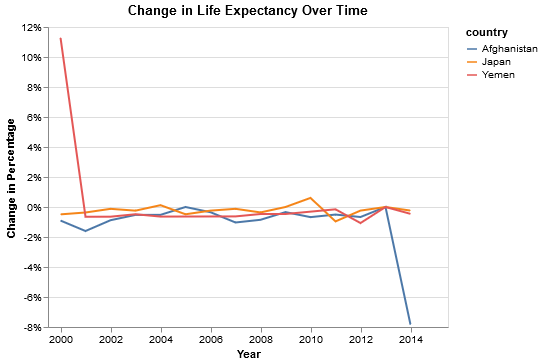

In [9]:
make_life_line_plots(country, 'N')

In [10]:
def make_GDP_line_plots(country=['Afghanistan'], Yaxis_checked='original'):
    
    #filter country input[list]
    who_df_filter = who_df[who_df.country.isin(country)]
    
    
    line_chart = alt.Chart(who_df_filter).mark_line().encode(
        alt.X('year:O', axis=alt.Axis(labelAngle=0,
                                      title='Year',
                                     values=list(range(2000, 2017, 2)))),
        alt.Color('country')
    ).properties(width=400, height=300)
    
    ##checkbox for life expectancy or change in life expectancy
    if Yaxis_checked=='original':
        return line_chart.encode(
            alt.Y('gdp', title='GDP')
        ).properties(title='GDP Over Time')
    
    else:
        return line_chart.encode(
        alt.Y('gdp_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
    ).properties(title='Change in GDP Over Time')

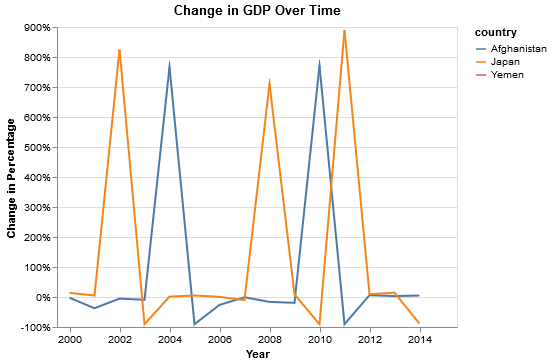

In [11]:
make_GDP_line_plots(country, 'N')

In [ ]:
def make_line_plots(country=['Afghanistan'], Yaxis_checked='original'):
    
    #filter country input[list]
    who_df_filter = who_df[who_df.country.isin(country)]
    
    
    line_chart = alt.Chart(who_df_filter).mark_line().encode(
        alt.X('year:O', axis=alt.Axis(labelAngle=0,
                                      title='Year',
                                     values=list(range(2000, 2017, 2)))),
        alt.Color('country')
    ).properties(width=400, height=300)
    
    ##checkbox for original number or change by percentage than last year
    if Yaxis_checked=='original':
        
        life_chart = line_chart.encode(
            alt.Y('life_expectancy', title='Life Expectancy')
        ).properties(title='Life Expectancy Over Time')
        
        gdp_chart = line_chart.encode(
            alt.Y('gdp', title='GDP')
            ).properties(title='GDP Over Time')
            
        return alt.vconcat(life_chart, gdp_chart)
    
    else:
        
        life_chart = line_chart.encode(
        alt.Y('life_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
    ).properties(title='Change in Life Expectancy Over Time')
            
        gdp_chart = line_chart.encode(
        alt.Y('gdp_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
        ).properties(title='Change in GDP Over Time')
            
        return alt.vconcat(life_chart, gdp_chart)

## Two plots in one function

In [8]:
who_df['life_pct_change']=who_df.groupby('country').agg({'life_expectancy':'pct_change'})
who_df['gdp_pct_change']=who_df.groupby('country').agg({'gdp':'pct_change'})

In [13]:
def selection(data, y_axis='life_expectancy'):
    '''
    Retun selection layers for interactive plots
    '''
    nearest = alt.selection_single(encodings=['x'], 
                                   on='mouseover',  
                                   nearest=True,    
                                   empty='none')
    
    line_chart = alt.Chart(data).mark_line().encode(
        alt.X('year:O', axis=alt.Axis(labelAngle=0,
                                      title='Year',
                                      values=list(range(2000, 2017, 2)))),
        alt.Color('country')
    ).properties(width=400, height=300)
    
    base = line_chart.encode(
            alt.Y(y_axis))
    
    selector = base.mark_point().encode(
                opacity=alt.condition(nearest, alt.value(1), alt.value(0))
                ).add_selection(nearest)
    
    rules = alt.Chart(data).mark_rule(color='gray').encode(
                x='year:O').transform_filter(nearest)
    
    text = base.mark_text(align='left', dx=5, dy=-5).encode(
                text=alt.condition(nearest, y_axis, alt.value(' '))
                ).transform_filter(nearest)
    
    return selector, rules, text


def make_line_plots(country=['Afghanistan'], Yaxis_checked='original'):
    
    #filter country input[list]
    who_df_filter = who_df[who_df.country.isin(country)]
    
    
    line_chart = alt.Chart(who_df_filter).mark_line().encode(
        alt.X('year:O', axis=alt.Axis(labelAngle=0,
                                      title='Year',
                                     values=list(range(2000, 2017, 2)))),
        alt.Color('country')
    ).properties(width=400, height=300)
    
    ##checkbox for original number or change by percentage than last year
    if Yaxis_checked=='original':
        
        #####life expectancy
        life_chart = line_chart.encode(
            alt.Y('life_expectancy', title='Life Expectancy')
        ).properties(title='Life Expectancy Over Time')
        
        selector, rules, text = selection(who_df_filter, 'life_expectancy')
        
        life_chart_inter = alt.layer(life_chart, selector, rules, text)
        
        #####GDP
        gdp_chart = line_chart.encode(
            alt.Y('gdp', title='GDP')
            ).properties(title='GDP Over Time')
        
        selector, rules, text = selection(who_df_filter, 'gdp')
        
        gdp_chart_inter = alt.layer(gdp_chart, selector, rules, text)
            
        return alt.vconcat(life_chart_inter, gdp_chart_inter)
    
    else:
        ########life expectancy in %
        life_chart = line_chart.encode(
        alt.Y('life_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
    ).properties(title='Change in Life Expectancy Over Time')
        
        selector, rules, text = selection(who_df_filter, 'life_pct_change')
        
        life_chart_inter = alt.layer(life_chart, selector, rules, text)
        
        #######gdp in %
        gdp_chart = line_chart.encode(
        alt.Y('gdp_pct_change', title='Change in Percentage',
              axis=alt.Axis(format='%'))
        ).properties(title='Change in GDP Over Time')
        
        selector, rules, text = selection(who_df_filter, 'gdp_pct_change')
        
        gdp_chart_inter = alt.layer(gdp_chart, selector, rules, text)
            
        return alt.vconcat(life_chart_inter, gdp_chart_inter)

In [16]:
country = ['Afghanistan', 'Japan', 'Yemen']

In [14]:
country = ['Ireland', 'Iraq', 'Fiji']

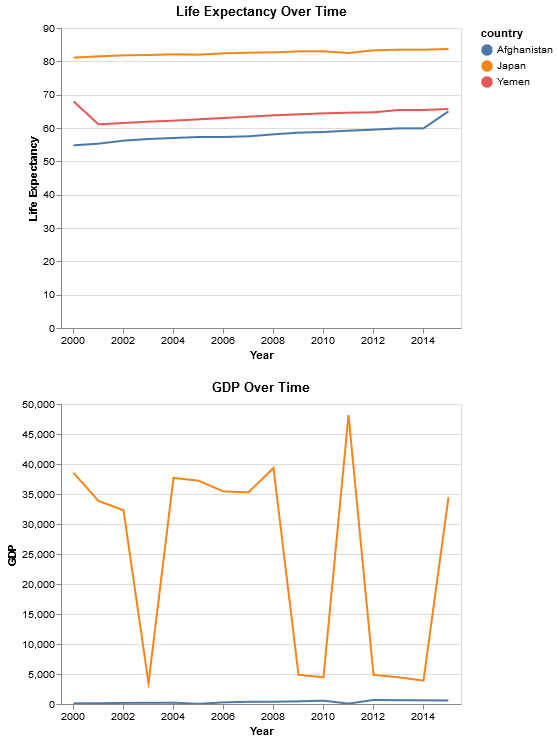

In [18]:
make_line_plots(country)